In [4]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from sklearn import  preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn import svm
from yellowbrick.model_selection import learning_curve
from sklearn.ensemble import AdaBoostClassifier
from wordcloud import WordCloud, STOPWORDS
from sklearn.ensemble import RandomForestClassifier 
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("dataset.csv", encoding='ANSI')
df.head()

,tweets,ideology
0,remembering comrade govind pansare on his mart...,Leftist
1,adanis overvalued companies are a threat not j...,Leftist
2,my article in the indian express on the adani ...,Leftist
3,remembering the pioneer of organised communist...,Neutral
4,our republic was formed with the motto of saty...,Leftist


In [6]:
df_left= df[df.ideology== 'Leftist']
df_right= df[df.ideology== 'Rightist']
df_neutral= df[df.ideology== 'Neutral']

In [7]:
df_right

,tweets,ideology
399,had a great discussion with you on diverse sub...,Rightist
400,amrit kaal budget accelerates the momentum for...,Rightist
401,it is good to see that you have taken so much ...,Rightist
402,our government is fully committed for sustaina...,Rightist
404,brilliant connection with nature as well as he...,Rightist
...,...,...
39136,tume har keemat hogi hogi indiareadyforwar pok...,Rightist
39137,and pakistan too indiareadyforwar,Rightist
39138,ysjaganfailedcm chandrayaan2 nayanthara rajivg...,Rightist
39139,indiareadyforwar india will always have to be ...,Rightist


In [8]:
df['ideology'].value_counts()

Neutral     18531
Rightist    18436
Leftist     15713
Name: ideology, dtype: int64

<AxesSubplot: ylabel='ideology'>

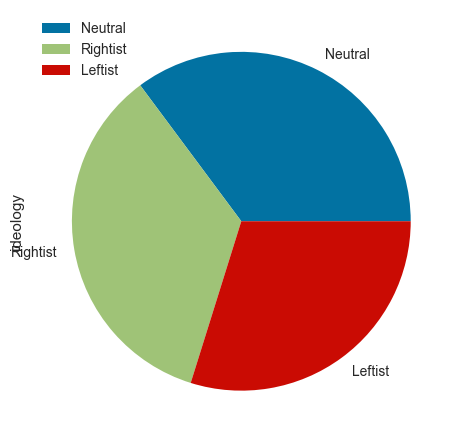

In [9]:
df.ideology.value_counts().plot(kind='pie', legend=True) 

In [10]:
stopwords = set(STOPWORDS)
stopwords = ['nan', 'NaN', 'Nan', 'NAN'] + list(STOPWORDS)

... : 1


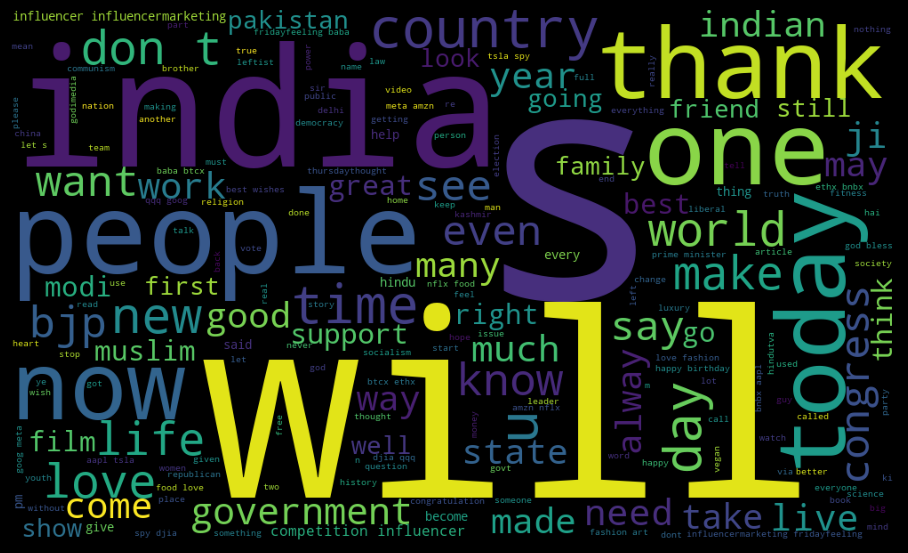

In [11]:

#word cloud for the entire data set

comment_words = '' 

values = df['tweets'].values

for val in values: 
    val = str(val) 
    tokens = val.split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    comment_words += ' '.join(tokens)+' '

text = """...""" # your text

text.split()
count = {}
for word in text.split():
	count.setdefault(word, 0)
	count[word] += 1

list_count = list(count.items())
list_count.sort(key=lambda i: i[1], reverse=True)
for i in list_count:
    print(i[0], ':', i[1])    

facecolor = 'black'

wordcloud = WordCloud(width=1000, height=600, 
            background_color=facecolor, 
            stopwords=stopwords,
            min_font_size=10).generate(comment_words)

plt.figure(figsize=(10,6), facecolor=facecolor) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad=2)


... : 1


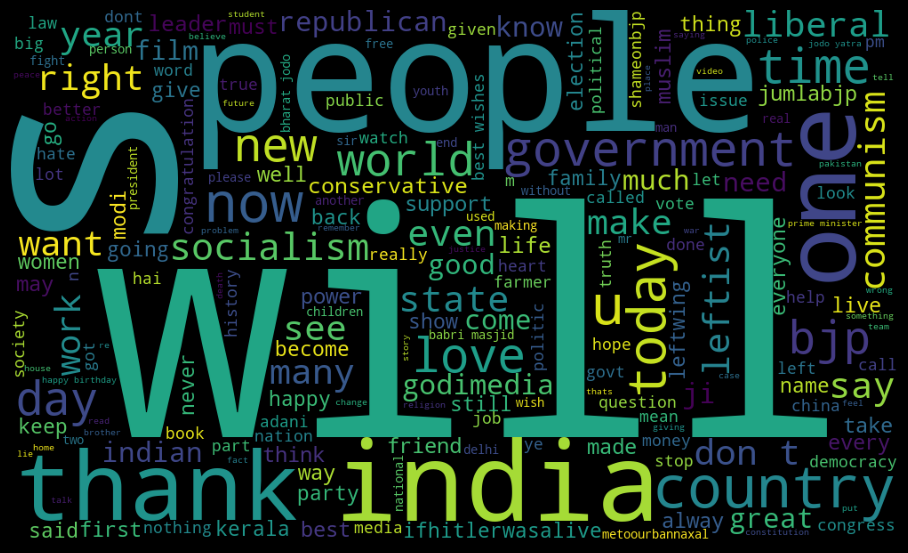

In [12]:
#word cloud for the leftist set

comment_words = '' 

values = df_left['tweets'].values

for val in values: 
    val = str(val) 
    tokens = val.split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    comment_words += ' '.join(tokens)+' '

text = """...""" # your text

text.split()
count = {}
for word in text.split():
	count.setdefault(word, 0)
	count[word] += 1

list_count = list(count.items())
list_count.sort(key=lambda i: i[1], reverse=True)
for i in list_count:
    print(i[0], ':', i[1])    

facecolor = 'black'

wordcloud = WordCloud(width=1000, height=600, 
            background_color=facecolor, 
            stopwords=stopwords,
            min_font_size=10).generate(comment_words)

plt.figure(figsize=(10,6), facecolor=facecolor) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad=2)

... : 1


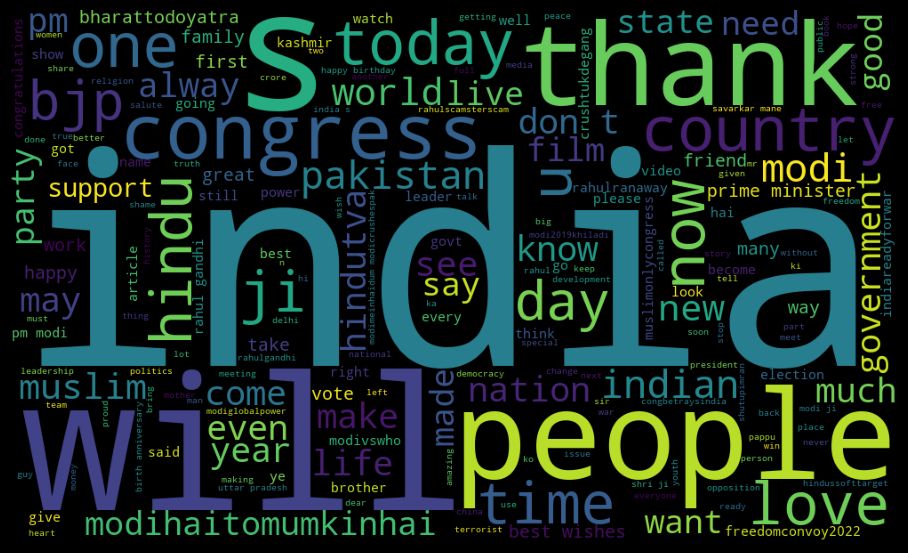

In [13]:
#word cloud for the rightist set

comment_words = '' 

values = df_right['tweets'].values

for val in values: 
    val = str(val) 
    tokens = val.split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    comment_words += ' '.join(tokens)+' '

text = """...""" # your text

text.split()
count = {}
for word in text.split():
	count.setdefault(word, 0)
	count[word] += 1

list_count = list(count.items())
list_count.sort(key=lambda i: i[1], reverse=True)
for i in list_count:
    print(i[0], ':', i[1])    

facecolor = 'black'

wordcloud = WordCloud(width=1000, height=600, 
            background_color=facecolor, 
            stopwords=stopwords,
            min_font_size=10).generate(comment_words)

plt.figure(figsize=(10,6), facecolor=facecolor) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad=2)

... : 1


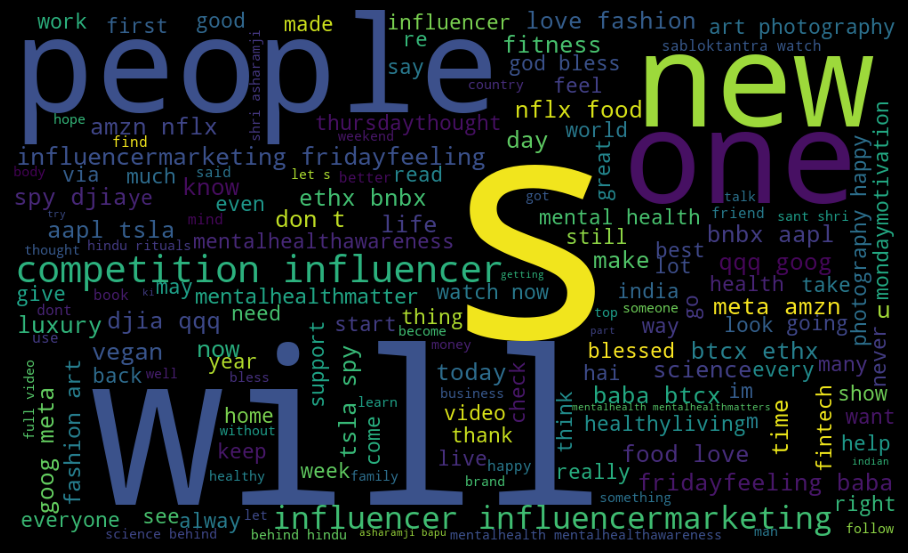

In [14]:
#word cloud for the neutral set

comment_words = '' 

values = df_neutral['tweets'].values

for val in values: 
    val = str(val) 
    tokens = val.split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    comment_words += ' '.join(tokens)+' '

text = """...""" # your text

text.split()
count = {}
for word in text.split():
	count.setdefault(word, 0)
	count[word] += 1

list_count = list(count.items())
list_count.sort(key=lambda i: i[1], reverse=True)
for i in list_count:
    print(i[0], ':', i[1])    

facecolor = 'black'

wordcloud = WordCloud(width=1000, height=600, 
            background_color=facecolor, 
            stopwords=stopwords,
            min_font_size=10).generate(comment_words)

plt.figure(figsize=(10,6), facecolor=facecolor) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad=2)

In [15]:
features= DataFrame(data= df, columns=['tweets'])
target= DataFrame(data= df, columns=['ideology'])

In [16]:
features

,tweets
0,remembering comrade govind pansare on his mart...
1,adanis overvalued companies are a threat not j...
2,my article in the indian express on the adani ...
3,remembering the pioneer of organised communist...
4,our republic was formed with the motto of saty...
...,...
52675,valextra medium iside valextra bag handbag whi...
52676,for sale villaluxury home guadalmina baja gua...
52677,celine handbag ladies 18979 3dru tote bag lugg...
52678,inside 300ft luxury superyacht for alisters an...


In [17]:
target.head()

,ideology
0,Leftist
1,Leftist
2,Leftist
3,Neutral
4,Leftist


In [18]:
#use label encoding to handle categorical variables

label= preprocessing.LabelEncoder()

t= label.fit_transform(target)

target= pd.DataFrame(t, columns= ['ideology'])

target.head()

classes=label.classes_

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.tweets, target, test_size=0.20, random_state=20,shuffle=True)

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk.stem
from nltk import word_tokenize 
from nltk.stem import WordNetLemmatizer

In [21]:
#nltk.download('wordnet')
#nltk.download('omw-1.4')

In [22]:
#class for lemmatization
import re
class LemmaTokenizer:
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        regex_num_ponctuation = '(\d+)|([^\w\s])'
        regex_little_words = r'(\b\w{1,2}\b)'
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc) 
                if not re.search(regex_num_ponctuation, t) and not re.search(regex_little_words, t)]

In [23]:
#custom stemmer class with stop words 

stemmer = nltk.stem.SnowballStemmer('english')
class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])

v = StemmedCountVectorizer(min_df=3, analyzer="word", stop_words='english', lowercase=False, tokenizer=LemmaTokenizer())

In [24]:
X_train_count = v.fit_transform(X_train.values)
X_test_count = v.transform(X_test)

In [26]:
X_test_count

<10536x13718 sparse matrix of type '<class 'numpy.int64'>'
	with 108966 stored elements in Compressed Sparse Row format>

In [28]:
count_array= X_train_count.toarray()[:3]
show = pd.DataFrame(data= count_array, columns= v.get_feature_names())
show

#lemm, stemm

,aaa,aab,aacha,aachi,aadhar,aadi,aadmi,aag,aah,aaiyega,...,zone,zoo,zoom,zorawar,zoya,zoyaakhtar,zubair,zuckerberg,zyaada,zyada
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### MODELS

In [29]:
#naive baise algo

from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count,y_train)
model.score(X_test_count, y_test)


0.7637623386484435

In [34]:
#logistic regression

model = LogisticRegression(max_iter= 300, solver= 'saga', C= 0.7,)
model.fit(X_train_count,y_train)
model.score(X_test_count, y_test)

0.8017274107820805

In [36]:
a= "i feel happy being a part of bjp"
a_ser= pd.Series(a)
f= v.transform(a_ser)

print(model.predict(f))
print(model.predict_proba(f))

[2]
[[0.27621353 0.28229229 0.44149418]]


In [31]:
predictions = model.predict(X_test_count)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.72      0.76      3123
           1       0.81      0.88      0.85      3652
           2       0.81      0.81      0.81      3761

    accuracy                           0.81     10536
   macro avg       0.81      0.80      0.80     10536
weighted avg       0.81      0.81      0.81     10536



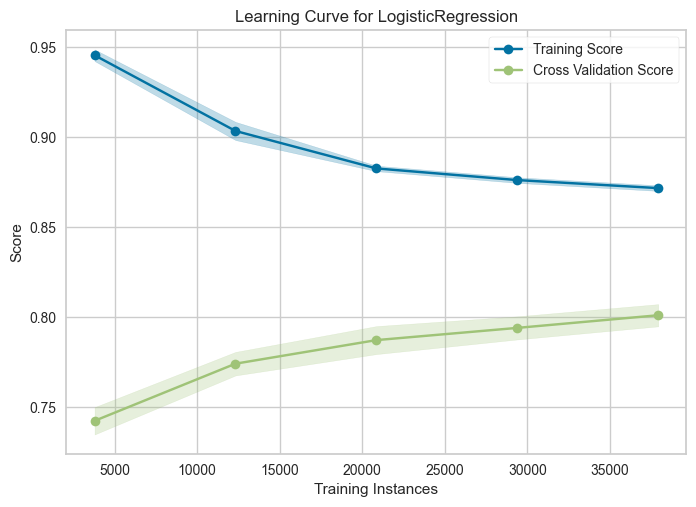

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [32]:
print(learning_curve(model, X_train_count, y_train, cv= 10, scoring= 'accuracy'))

0.8077069096431283

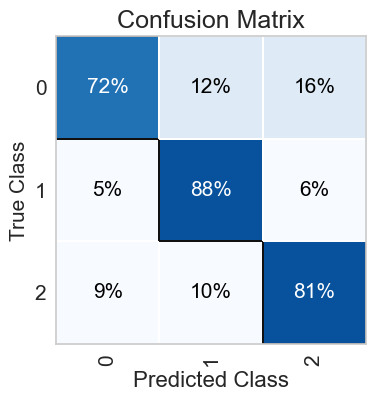

In [33]:
from yellowbrick.classifier import ConfusionMatrix

plt.title("Confusion Matrix", fontsize=18)
plt.xlabel("Predicted Class", fontsize=16)
plt.ylabel("True Class", fontsize=15)
cm = ConfusionMatrix(model,  size=(400,400), percent= True, 
fontsize=15, cmap='Blues')
cm.fit(X_train_count, y_train)
cm.score(X_test_count, y_test)


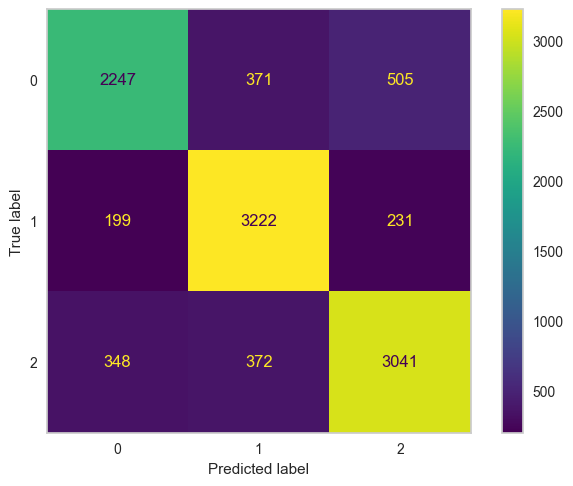

In [34]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, model.predict(X_test_count))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, )

cm_display.plot()
plt.grid(False)
plt.show()

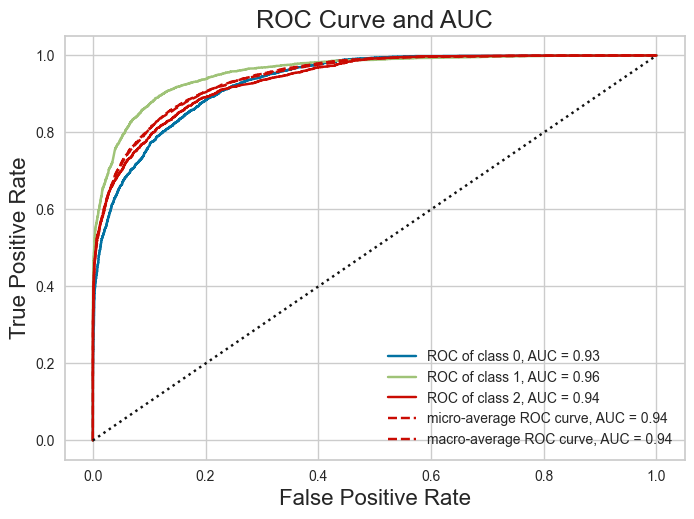

In [36]:
from yellowbrick.classifier import ROCAUC
plt.figure()
plt.title("ROC Curve and AUC", fontsize=18)
plt.xlabel("False Positive Rate", fontsize=16)
plt.ylabel("True Positive Rate", fontsize=16)
visualizer = ROCAUC(model)
visualizer.fit(X_train_count, y_train)
visualizer.score(X_test_count, y_test)
plt.legend()

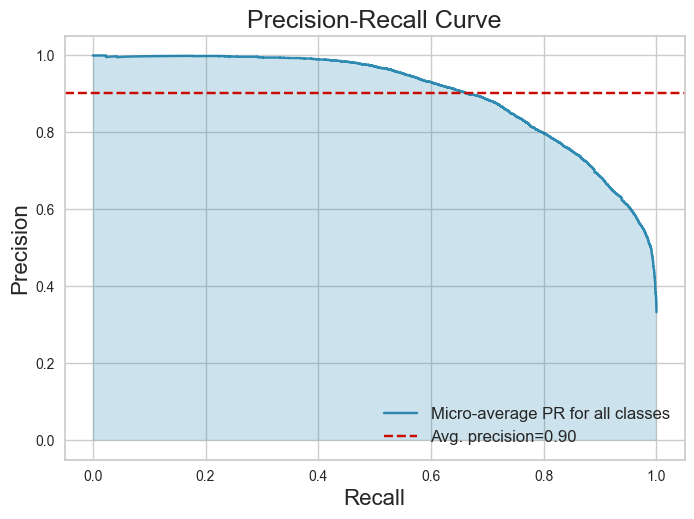

In [37]:
from yellowbrick.classifier import PrecisionRecallCurve
plt.figure()
plt.title("Precision-Recall Curve", fontsize=18)
plt.xlabel("Recall", fontsize=16)
plt.ylabel("Precision", fontsize=16)
viz = PrecisionRecallCurve(model)
viz.fit(X_train_count, y_train)
viz.score(X_test_count, y_test)
plt.legend(loc='lower right', fontsize=12)

In [38]:
#support vector machine

model = svm.SVC()
model.fit(X_train_count,y_train)
model.score(X_test_count, y_test)

0.7953682611996963

In [39]:
#random forest

model = RandomForestClassifier(max_features=0.2)
model.fit(X_train_count,y_train)
model.score(X_test_count, y_test)

0.7716400911161732

In [37]:
#ada boost

model= AdaBoostClassifier(n_estimators=985, learning_rate=0.6)
model.fit(X_train_count,y_train)
model.score(X_test_count, y_test)

: 

: 

In [1]:
#RidgeClassifier

from sklearn.linear_model import RidgeClassifier
model= RidgeClassifier(max_iter= 12)
model.fit(X_train_count,y_train)
model.score(X_test_count, y_test)

NameError: name 'X_train_count' is not defined